In [1]:
import sys
import json
import numpy as np
import pandas as pd
import time
import cv2
from sklearn.preprocessing import LabelEncoder

In [5]:
class SVM:
    def __init__(self, json_both, json_onlyleft, json_onlyright, json_radio, json_drinking, json_reachside, json_phonecallright):
        self.both_j = json_both
        self.onlyleft_j = json_onlyleft
        self.onlyright_j = json_onlyright
        self.radio_j = json_radio
        self.drinking_j = json_drinking
        self.reachside_j = json_reachside
        self.phonecallright_j = json_phonecallright

        self.both = []
        self.onlyleft = []
        self.onlyright = []
        self.radio = []
        self.drinking = []
        self.reachside = []
        self.phonecallright = []

        self.rows = []

    def open_jsons(self):

        try:
            with open(self.both_j, 'r', encoding='utf-8-sig') as f:
                self.both = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.both_j}. Trying alternative encoding...")
            with open(self.both_j, 'r', encoding='latin-1') as f:
                self.both = json.load(f)

        try:
            with open(self.onlyleft_j, 'r', encoding='utf-8-sig') as f:
                self.onlyleft = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.onlyleft_j}. Trying alternative encoding...")
            with open(self.onlyleft_j, 'r', encoding='latin-1') as f:
                self.onlyleft = json.load(f)

        try:
            with open(self.onlyright_j, 'r', encoding='utf-8-sig') as f:
                self.onlyright = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.onlyright_j}. Trying alternative encoding...")
            with open(self.onlyright_j, 'r', encoding='latin-1') as f:
                self.onlyright = json.load(f)

        try:
            with open(self.radio_j, 'r', encoding='utf-8-sig') as f:
                self.radio = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.radio_j}. Trying alternative encoding...")
            with open(self.radio_j, 'r', encoding='latin-1') as f:
                self.radio = json.load(f)

        try:
            with open(self.drinking_j, 'r', encoding='utf-8-sig') as f:
                self.drinking = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.drinking_j}. Trying alternative encoding...")
            with open(self.drinking_j, 'r', encoding='latin-1') as f:
                self.drinking = json.load(f)

        try:
            with open(self.reachside_j, 'r', encoding='utf-8-sig') as f:
                self.reachside = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.reachside_j}. Trying alternative encoding...")
            with open(self.reachside_j, 'r', encoding='latin-1') as f:
                self.reachside = json.load(f)

        try:
            with open(self.phonecallright_j, 'r', encoding='utf-8-sig') as f:
                self.phonecallright = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.phonecallright_j}. Trying alternative encoding...")
            with open(self.phonecallright_j, 'r', encoding='latin-1') as f:
                self.phonecallright = json.load(f)

    def prepare_data(self, data):

        for item in data:

            features = {
                "center_left_x": item['pose']['pose'][50][0],
                "center_left_y": item['pose']['pose'][50][1],
                "center_right_x": item['pose']['pose'][51][0],
                "center_right_y": item['pose']['pose'][51][1],
                "pose_0_x": item['pose']['pose'][0][0],
                "pose_0_y": item['pose']['pose'][0][1],
                "pose_1_x": item['pose']['pose'][1][0],
                "pose_1_y": item['pose']['pose'][1][1],
                "pose_2_x": item['pose']['pose'][2][0],
                "pose_2_y": item['pose']['pose'][2][1],
                "pose_3_x": item['pose']['pose'][3][0],
                "pose_3_y": item['pose']['pose'][3][1],
                "pose_4_x": item['pose']['pose'][4][0],
                "pose_4_y": item['pose']['pose'][4][1],
                "pose_5_x": item['pose']['pose'][5][0],
                "pose_5_y": item['pose']['pose'][5][1],
                # "json": item['json'],
                # "frame": item['frame'],
                "label": item['type'] # cambiar el label
            }
            
            self.rows.append(features)


In [6]:
json_files = [  '/home/arantxa/universidad/TFG/src/balanced_data/hands_using_wheel_both.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/hands_using_wheel_only_left.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/hands_using_wheel_only_right.json',
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_radio.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_drinking.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_reach_side.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_phonecall_right.json']

        
SVM_performer = SVM(*json_files)
SVM_performer.open_jsons()
SVM_performer.prepare_data(SVM_performer.both)
SVM_performer.prepare_data(SVM_performer.onlyleft)
SVM_performer.prepare_data(SVM_performer.onlyright)
SVM_performer.prepare_data(SVM_performer.radio)
SVM_performer.prepare_data(SVM_performer.drinking)
SVM_performer.prepare_data(SVM_performer.reachside)
SVM_performer.prepare_data(SVM_performer.phonecallright)

dataset = pd.DataFrame(SVM_performer.rows)
print(dataset)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.742518       0.620522        0.691809        0.320131  0.373852   
2          0.742530       0.621325        0.690298        0.318795  0.373532   
3          0.741649       0.623132        0.689433        0.322306  0.374355   
4          0.742516       0.620976        0.688865        0.321779  0.374417   
...             ...            ...             ...             ...       ...   
9295       0.332028       0.210118        0.725491        0.403355  0.345658   
9296       0.332467       0.209694        0.726125        0.398464  0.341597   
9297       0.332491       0.209401        0.726425        0.393098  0.338317   
9298       0.332165       0.209000        0.726959        0.387802  0.334666   
9299       0.331942       0.209576        0.727659        0.382270  0.333337   

      pose_0_y  pose_1_x  pose_1_y  pos

In [7]:
dataset['label'] = dataset['label'].replace("hands_using_wheel/both", 0)
dataset['label'] = dataset['label'].replace("hands_using_wheel/only_left", 1)
dataset['label'] = dataset['label'].replace("hands_using_wheel/only_right", 2)
dataset['label'] = dataset['label'].replace("driver_actions/radio", 3)
dataset['label'] = dataset['label'].replace("driver_actions/drinking", 4)
dataset['label'] = dataset['label'].replace("driver_actions/reach_side", 5)
dataset['label'] = dataset['label'].replace("driver_actions/phonecall_right", 6)

In [8]:
dataset_multilabel = pd.get_dummies(dataset['label'], prefix='class').astype(int)

dataset = pd.concat([dataset, dataset_multilabel], axis=1)
print(dataset)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.742518       0.620522        0.691809        0.320131  0.373852   
2          0.742530       0.621325        0.690298        0.318795  0.373532   
3          0.741649       0.623132        0.689433        0.322306  0.374355   
4          0.742516       0.620976        0.688865        0.321779  0.374417   
...             ...            ...             ...             ...       ...   
9295       0.332028       0.210118        0.725491        0.403355  0.345658   
9296       0.332467       0.209694        0.726125        0.398464  0.341597   
9297       0.332491       0.209401        0.726425        0.393098  0.338317   
9298       0.332165       0.209000        0.726959        0.387802  0.334666   
9299       0.331942       0.209576        0.727659        0.382270  0.333337   

      pose_0_y  pose_1_x  pose_1_y  pos

In [9]:
num_classes = dataset['label'].max() + 1

dataset['multilabel'] = dataset['label'].apply(lambda x: [1 if i == x else 0 for i in range(num_classes)])

dataset = dataset.drop(columns=['label'])
dataset = dataset.drop(columns=['class_0'])
dataset = dataset.drop(columns=['class_1'])
dataset = dataset.drop(columns=['class_2'])
dataset = dataset.drop(columns=['class_3'])
dataset = dataset.drop(columns=['class_4'])
dataset = dataset.drop(columns=['class_5'])
dataset = dataset.drop(columns=['class_6'])

print(dataset)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.742518       0.620522        0.691809        0.320131  0.373852   
2          0.742530       0.621325        0.690298        0.318795  0.373532   
3          0.741649       0.623132        0.689433        0.322306  0.374355   
4          0.742516       0.620976        0.688865        0.321779  0.374417   
...             ...            ...             ...             ...       ...   
9295       0.332028       0.210118        0.725491        0.403355  0.345658   
9296       0.332467       0.209694        0.726125        0.398464  0.341597   
9297       0.332491       0.209401        0.726425        0.393098  0.338317   
9298       0.332165       0.209000        0.726959        0.387802  0.334666   
9299       0.331942       0.209576        0.727659        0.382270  0.333337   

      pose_0_y  pose_1_x  pose_1_y  pos

In [8]:
cols_to_group = dataset.columns.difference(["multilabel"])
grouped = dataset.groupby(list(cols_to_group))["multilabel"].apply(
    lambda x: [int(any(values)) for values in zip(*x)]
).reset_index()

dataset = grouped

# for _, row in grouped.iterrows():
#     multilabel = row["multilabel"]
#     if sum(multilabel) > 1:  
#         print(f"Fila agrupada: {row.to_dict()}")

# -----------------------------------------------------
# salia que había 44 iguales (o sea 22 menos)
# -----------------------------------------------------

In [10]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1] # todo menos etiquetas
Y = dataset.iloc[:, -1] # etiquetas

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y, test_size=0.25, random_state=1, stratify=Y) 


In [11]:
train_class_counts = pd.Series(Y_train).value_counts()

test_class_counts = pd.Series(Y_test).value_counts()

print("Distribución de clases en el conjunto de entrenamiento:")
print(train_class_counts)

print("\nDistribución de clases en el conjunto de prueba:")
print(test_class_counts)

Distribución de clases en el conjunto de entrenamiento:
multilabel
[1, 0, 0, 0, 0, 0, 0]    2250
[0, 0, 0, 0, 0, 1, 0]     788
[0, 0, 0, 0, 1, 0, 0]     788
[0, 0, 1, 0, 0, 0, 0]     788
[0, 1, 0, 0, 0, 0, 0]     787
[0, 0, 0, 1, 0, 0, 0]     787
[0, 0, 0, 0, 0, 0, 1]     787
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
multilabel
[1, 0, 0, 0, 0, 0, 0]    750
[0, 0, 0, 0, 0, 0, 1]    263
[0, 1, 0, 0, 0, 0, 0]    263
[0, 0, 0, 1, 0, 0, 0]    263
[0, 0, 1, 0, 0, 0, 0]    262
[0, 0, 0, 0, 1, 0, 0]    262
[0, 0, 0, 0, 0, 1, 0]    262
Name: count, dtype: int64


In [12]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

Y_train_bin = np.array(list(Y_train)) 
Y_test_bin = np.array(list(Y_test)) 

print("Formato de Y_train_bin:", Y_train_bin.shape)

# multilabel_model = OneVsRestClassifier(SVC(kernel="linear", random_state=1))
multilabel_model = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=1))
multilabel_model.fit(X_train, Y_train_bin)

Y_pred_multilabel = multilabel_model.predict(X_test)
Y_train_pred = multilabel_model.predict(X_train)

print("Predicciones multilabel (primeras 5 filas):\n", Y_pred_multilabel[:5])

# Obtener las probabilidades en lugar de predicciones binarias
Y_pred_prob = multilabel_model.predict_proba(X_test)
Y_pred_prob_percent = (Y_pred_prob * 100).round(2) 
np.set_printoptions(suppress=True, precision=2)
print("Probabilidades multilabel (primeras 5 filas, en porcentaje):\n", Y_pred_prob_percent[:5])


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_train_bin, Y_train_pred)
print("Precisión (entrenamiento):", accuracy)

accuracy = accuracy_score(Y_test_bin, Y_pred_multilabel)
print("Precisión:", accuracy)

Formato de Y_train_bin: (6975, 7)
Predicciones multilabel (primeras 5 filas):
 [[1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Probabilidades multilabel (primeras 5 filas, en porcentaje):
 [[61.65  0.1   0.32  1.63  1.09  0.72  0.81]
 [76.21  0.34  0.    0.14  1.6  11.29  0.74]
 [ 0.01  0.06 81.67  0.33  0.03  5.28  9.9 ]
 [76.88  0.29  0.    0.06  2.08  8.13  0.26]
 [ 0.02  8.04  0.01  0.    3.83  0.03 92.32]]
Precisión (entrenamiento): 0.6777060931899641
Precisión: 0.683010752688172


In [13]:
from sklearn.metrics import f1_score, hamming_loss

# F1-Score macro (promedio entre etiquetas)
f1_macro = f1_score(Y_test_bin, Y_pred_multilabel, average='macro')
print("F1-Score (macro):", f1_macro)

# F1-Score micro (considera instancias y etiquetas en conjunto)
f1_micro = f1_score(Y_test_bin, Y_pred_multilabel, average='micro')
print("F1-Score (micro):", f1_micro)

# Hamming Loss
hamming = hamming_loss(Y_test_bin, Y_pred_multilabel)
print("Hamming Loss:", hamming)


F1-Score (macro): 0.7510994910817691
F1-Score (micro): 0.8108474576271186
Hamming Loss: 0.05142857142857143


/home/arantxa/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


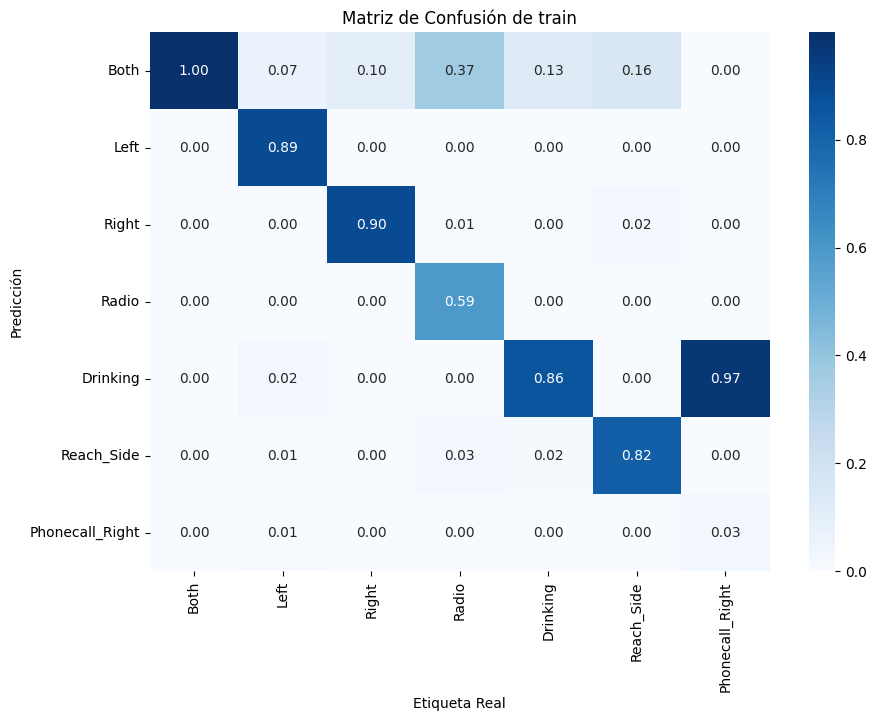

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# etiquetas de las clases
class_labels = ['Both', 'Left', 'Right', 'Radio', 'Drinking', 'Reach_Side', 'Phonecall_Right']

n_labels = Y_train_bin.shape[1] # total de etiquetas

# Inicializar la matriz de confusión global
global_conf_matrix = np.zeros((n_labels, n_labels))

for i in range(Y_train_bin.shape[0]): 
    for j in range(n_labels): 
        if Y_train_bin[i, j] == 1: # Si la etiqueta real es 1
            for k in range(n_labels):  # Ver en qué clase se predijo
                global_conf_matrix[j, k] += Y_train_pred[i, k]  

row_sums = global_conf_matrix.sum(axis=1, keepdims=True) 
global_conf_matrix_normalized = global_conf_matrix / row_sums

# Visualizar la matriz de confusión global normalizada
plt.figure(figsize=(10, 7))
sns.heatmap(global_conf_matrix_normalized.T, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_labels,  # Usar las etiquetas personalizadas
            yticklabels=class_labels)  
plt.xlabel("Etiqueta Real")
plt.ylabel("Predicción")
plt.title("Matriz de Confusión de train")
plt.show()

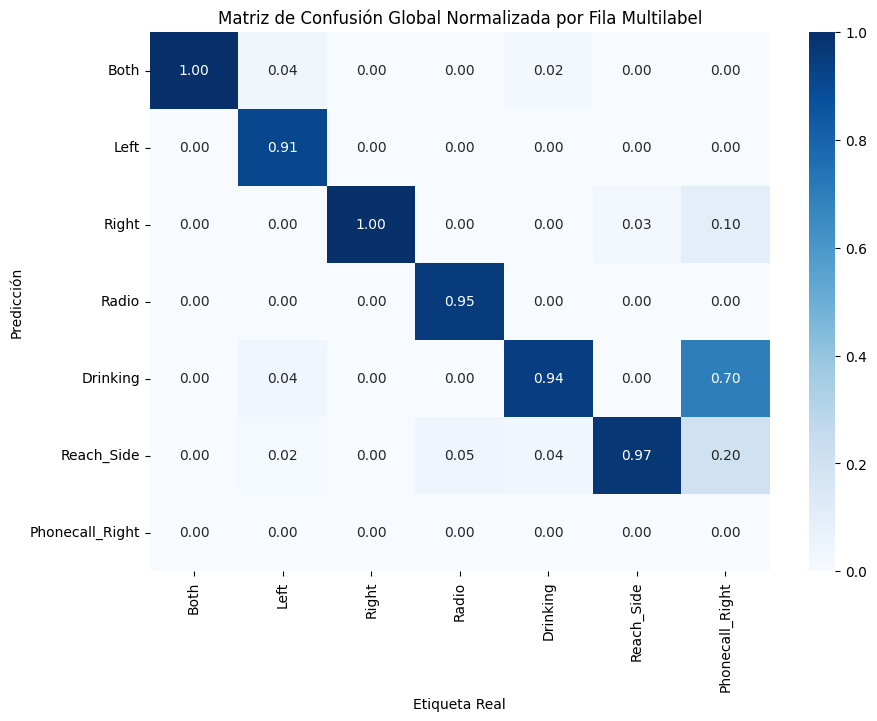

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# etiquetas de las clases
class_labels = ['Both', 'Left', 'Right', 'Radio', 'Drinking', 'Reach_Side', 'Phonecall_Right']

n_labels = Y_test_bin.shape[1] # total de etiquetas

# Inicializar la matriz de confusión global
global_conf_matrix = np.zeros((n_labels, n_labels))

for i in range(Y_test_bin.shape[0]): 
    for j in range(n_labels): 
        if Y_test_bin[i, j] == 1: # Si la etiqueta real es 1
            for k in range(n_labels):  # Ver en qué clase se predijo
                global_conf_matrix[j, k] += Y_pred_multilabel[i, k]  

row_sums = global_conf_matrix.sum(axis=1, keepdims=True) 
global_conf_matrix_normalized = global_conf_matrix / row_sums

# Visualizar la matriz de confusión global normalizada
plt.figure(figsize=(10, 7))
sns.heatmap(global_conf_matrix_normalized.T, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_labels,  # Usar las etiquetas personalizadas
            yticklabels=class_labels)  
plt.xlabel("Etiqueta Real")
plt.ylabel("Predicción")
plt.title("Matriz de Confusión de test")
plt.show()


----------------------------------------------------------------------------------------------------------------------------------------
hasta aqui corregido

In [ ]:
class balanceReconstructor:
    def __init__(self, json_file, data_path):
        self.data_hands = []
        self.data_face = []
        self.data_pose = []
        self.data = []

        self.HANDS_CONNECTION = [
            (0, 1), (1, 2), (2, 3), (3, 4),
            (0, 5), (5, 6), (6, 7), (7, 8),
            (5, 9), (9, 10), (10, 11), (11, 12),
            (9, 13), (13, 14), (14, 15), (15, 16),
            (0, 17), (13, 17), (17, 18), (18, 19), (19, 20)
        ]

        self.FACE_CONNECTION = [ 
            (17, 291), (17, 61), (0, 61), (0, 291),
            (61, 4), (4, 291), (4, 48), (4, 278),
            (291, 426), (61, 206), (61, 50), (291, 280),
            (206, 48), (426, 278), (48, 50), (278, 280),
            (4, 107), (4, 336), (50, 145), (280, 374),
            (122, 107), (122, 145), (351, 336), (351, 374),
            (145, 130), (145, 133), (374, 359), (374, 362),
            (130, 159), (130, 46), (359, 386), (359, 276),
            (133, 159), (362, 386), (46, 105), (276, 334),
            (105, 107), (334, 336)          
        ]
        self.POSE_CONNECTION = [
            (12, 24), (12, 11), (11, 23), (24, 23),
            (12, 14), (14, 16), (11, 13), (13, 15)
        ]

        self.balanced_json = json_file
        self.data_path = data_path

    def open_json(self):
        # print(f"Opening JSON file {self.balanced_json}")
        try:
            with open(self.balanced_json, 'r', encoding='utf-8-sig') as f:
                self.data = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.balanced_json}. Trying alternative encoding...")
            with open(self.balanced_json, 'r', encoding='latin-1') as f:
                self.data = json.load(f)

    def reconstruct(self):
        self.open_json()

        for action in self.data:
            json_session = action['json'].split('/')[1]

            frame = action['frame']

            image_face = json_session + "_" + str(frame) + "_" + "face.png"
            image_hands = json_session + "_" + str(frame) + "_" + "hands.png"
            image_pose = json_session + "_" + str(frame) + "_" + "pose.png"

            path_pose = self.data_path + action['type'] + "/" + image_pose
            path_hands = self.data_path + action['type'] + "/" + image_hands
            path_face = self.data_path + action['type'] + "/" + image_face

            face_im = cv2.imread(path_face)
            hands_im = cv2.imread(path_hands)
            pose_im = cv2.imread(path_pose)

            # print(action)

            self.show_collage(face_im, hands_im, pose_im, action)

    def prepare_prediction(self, data):

        features = {
            "center_left_x": data['pose']['pose'][50][0],
            "center_left_y": data['pose']['pose'][50][1],
            "center_right_x": data['pose']['pose'][51][0],
            "center_right_y": data['pose']['pose'][51][1],
            "pose_0_x": data['pose']['pose'][0][0],
            "pose_0_y": data['pose']['pose'][0][1],
            "pose_1_x": data['pose']['pose'][1][0],
            "pose_1_y": data['pose']['pose'][1][1],
            "pose_2_x": data['pose']['pose'][2][0],
            "pose_2_y": data['pose']['pose'][2][1],
            "pose_3_x": data['pose']['pose'][3][0],
            "pose_3_y": data['pose']['pose'][3][1],
            "pose_4_x": data['pose']['pose'][4][0],
            "pose_4_y": data['pose']['pose'][4][1],
            "pose_5_x": data['pose']['pose'][5][0],
            "pose_5_y": data['pose']['pose'][5][1]
        }

        return features


    def show_collage(self, face_im, hands_im, pose_im, action):
        frame1 = hands_im
        frame2 = pose_im
        frame3 = face_im

        if frame1 is None or frame2 is None or frame3 is None:
            print("Error al leer uno de los frames")
            return
        
        # print("Action: ", action['type'])
        # print("action: ", action)

        features = self.prepare_prediction(action)

        # print("Features: ", features)

        prediction = multilabel_model.predict([list(features.values())])

        # contador = 0

        # for i, label in enumerate(prediction[0]):
        #     if label == 1:
        #         contador += 1
                                              
        # if(contador >= 1):

        print("Predicción: ", prediction)

        # self.paint_frame(frame1, action['frame'], "hands", action)
        # self.paint_frame(frame2, action['frame'], "pose", action)
        # self.paint_frame(frame3, action['frame'], "face", action)

        # height, width = frame1.shape[:2]
        # new_size = (width // 2, height // 2)

        # frame1 = cv2.resize(frame1, new_size)
        # frame2 = cv2.resize(frame2, new_size)
        # frame3 = cv2.resize(frame3, new_size)

        # combined_frame = np.zeros((height, width, 3), dtype=np.uint8)
        
        # combined_frame[0:height // 2, 0:width // 2] = frame1
        # combined_frame[0:height // 2, width // 2:width] = frame2
        # combined_frame[height // 2:height, 0:width // 2] = frame3

        # cv2.putText(combined_frame, action['type'], (width // 2 + 10, height // 2 + 30 + 1 * 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

        # cv2.imshow('Combined Video', combined_frame)
        # cv2.waitKey(1)

    def open_video(self, video_path):
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"No se pudo abrir el video {video_path}")
            return None
        cap.release()

    def paint_frame(self, frame, frame_number, json, data):
        # print("Frame: ", frame_number)
        if json == "hands":
            for x, y, z in data['hands']['hands']:
                x = int(x * frame.shape[1])
                y = int(y * frame.shape[0])
                cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

            for x, y in data['hands']['centers']:
                x = int(x * frame.shape[1])
                y = int(y * frame.shape[0])
                cv2.circle(frame, (x, y), 5, (255, 0, 0), 30)

            hand_right = data['hands']["hands"][:21]
            hand_left = data['hands']["hands"][21:]

            self.draw_connections(frame, hand_right, self.HANDS_CONNECTION)
            self.draw_connections(frame, hand_left, self.HANDS_CONNECTION)

        elif json == "pose":
            for x, y, z in data['pose']['pose']:
                x = int(x * frame.shape[1])
                y = int(y * frame.shape[0])
                cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

                pose_data = data['pose']["pose"][:8]
                right_hand = data['pose']["pose"][8:29]
                left_hand = data['pose']["pose"][29:50]

                self.draw_connections(frame, pose_data, self.POSE_CONNECTION)
                self.draw_connections(frame, right_hand, self.HANDS_CONNECTION)
                self.draw_connections(frame, left_hand, self.HANDS_CONNECTION)

        elif json == "face":
            for x, y, indx in data['face']["face"]:
                x = int(x * frame.shape[1])
                y = int(y * frame.shape[0])
                cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)
                # print("Face: ", x, y)

            for x, y in data['face']["gaze"]:
                x = int(x * frame.shape[1])
                y = int(y * frame.shape[0])
                cv2.circle(frame, (x, y), 5, (0, 0, 255), -1)

                self.draw_connections(frame, data['face']["face"], self.FACE_CONNECTION)

    def draw_connections(self, frame, keypoints, connections):

        for idx1, idx2 in connections:
            x1, y1, x2, y2 = None, None, None, None
            for x, y, inx in keypoints:
                if inx == idx1:
                    x1 = int(x * frame.shape[1])
                    y1 = int(y * frame.shape[0])
                elif inx == idx2:
                    x2 = int(x * frame.shape[1])
                    y2 = int(y * frame.shape[0])

            if x1 and y1 and x2 and y2:

                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)



In [19]:
sys.argv = [sys.argv[0], '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_drinking.json', '/home/arantxa/universidad/TFG/src/balanced_jsons/']

vr = balanceReconstructor(sys.argv[1], sys.argv[2])
vr.reconstruct()

Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicción:  [[0 0 0 0 0 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicción:  [[0 0 0 0 1 0 0]]
Predicci